<a href="https://colab.research.google.com/github/GuptaRitik/Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Often, more than one contact to the same client was required, in order to access if the bank term deposit would be subscribed or not. 
### This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans.

### By analyzing customer features, such as demographics and transaction history, the bank will be able to predict customer saving behaviors and identify which type of customers is more likely to make term deposits. The bank can then focus its marketing efforts on those customers. This will not only allow the bank to secure deposits more effectively but also increase customer satisfaction by reducing undesirable advertisements for certain customers.

### Main Objectives: predict customers' responses to future marketing campaigns & increase the effectiveness of the bank's telemarketing campaign

### The classification goal is to predict if the client will subscribe a term deposit '1' (yes) or '0' (no) of (variable y).


## <b> Data Description </b>

#### <b>Input variables: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: primary, secondary, tertiary, unknown)
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day: last contact day 
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


#### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

## **Process Towards Goal**

* Exploratory Data Analysis
* Data Cleaning- (missing values, outliers)
* Feature Engineering
* Pre-processing - (imbalances and scaling)
* Model Implementation
* Model evaluation
* Explainability and Conclusion


##Importing Necessary Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#import pylab as plb
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(12,8)})

In [ ]:
# reading Data
df = pd.read_csv('/content/drive/MyDrive/Capstones/Data/ML- Classification/Copy of bank-full.csv', sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### *Descriptive Statistics*

In [ ]:
# statistical analysis of data
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


We can see some extreme values in various features like age, balance, campaign. they need to be treated accordingly.

In [ ]:
# chcking for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Surprisingly! No null values are presented in data, means we can go further quickly.

## Exploratory Data Analysis

In [ ]:
# Storing categorcial columns in a list
cat_col = [col for col in df.columns if df[col].dtype== object]

# checking unique categories for each categorical feature and their counts
for i in cat_col:
  print(df[i].value_counts())
  print('------------')

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
------------
no     44396
yes      815
Name: default, dtype: int64
------------
yes    25130
no     20081
Name: housing, dtype: int64
------------
no     37967
yes     7244
Name: loan, dtype: int64
------------
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
------------
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
-------

Everything seems to be fine in data except the 'unknown' values, they needs to be treated well in cleanig procedure.

#### Need to convert month names to month numbers for convenience.

In [ ]:
lst = [df]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

df['month_int'] = df['month_int'].astype(int)

df.drop('month', axis=1, inplace=True)

## **Exploratory Data Analysis**

### *Checking the Class of Target feature*

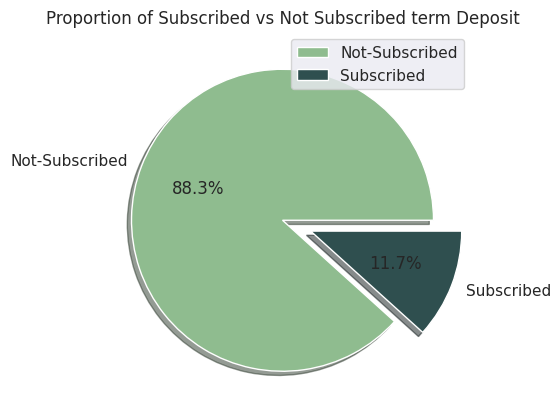

In [ ]:
# Ploting the pie chart to check the balance in the Target Variable.

plt.figure(figsize=(7,5), dpi=100)
proportion = df['y'].value_counts()
labels = ['Not-Subscribed','Subscribed']
plt.title('Proportion of Subscribed vs Not Subscribed term Deposit')
plt.pie(proportion, explode=(0,0.2), labels=labels, 
        shadow = True, autopct = '%1.1f%%', colors= ['#8FBC8F','#2F4F4F'])

plt.legend()
plt.show()

This has a highly imbalanced classes with approx ratio of 8:1, necessary steps to be taken to balance classes before input in model. 

### *Which age group is more focus by marketing team*

Text(0.5, 1.0, 'Age Distribution')

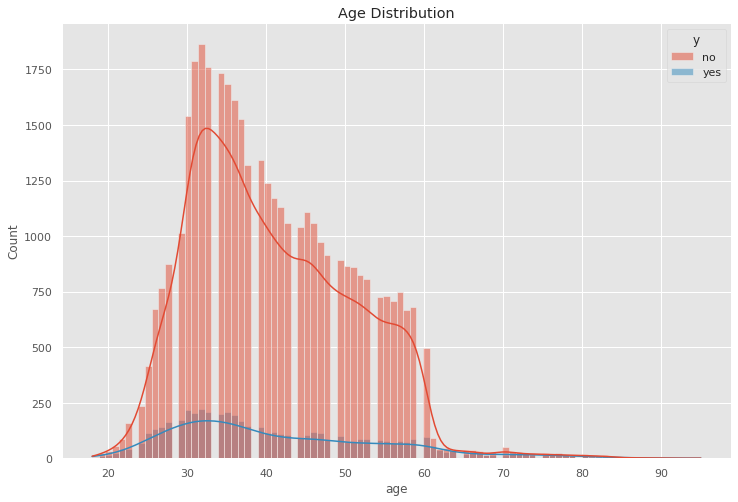

In [ ]:
# plotting histogram for age distribution
plt.style.use('ggplot')
sns.histplot(data=df, x="age",hue='y', bins='auto', kde=True)
plt.title('Age Distribution')

We noticed that, marketing team focusing from age 25 to 55 and specially focusing on age group 27 to 40, and that makes sense as peoples belongs to this age have most probability to subscribe, given by data that most of 'yes' (subscribed) is between 27-40 age group.

### *Job with respect to Subscription, Default credit, Hous loan and Personal loan*

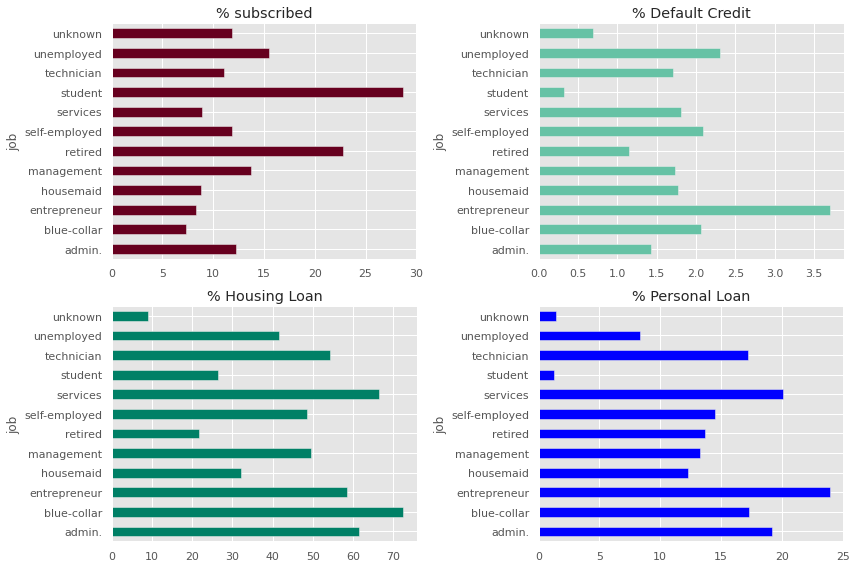

In [ ]:

# finding the percentage of subscription, default credits, house loan and personal loan and assigning on different dataframes
job_on_y = pd.crosstab(df['y'],df['job']).apply(lambda x: x/x.sum() * 100)
job_on_y = job_on_y.transpose()

job_on_d = pd.crosstab(df['default'],df['job']).apply(lambda x: x/x.sum() * 100)
job_on_d = job_on_d.transpose()

job_on_h = pd.crosstab(df['housing'],df['job']).apply(lambda x: x/x.sum() * 100)
job_on_h = job_on_h.transpose()

job_on_l = pd.crosstab(df['loan'],df['job']).apply(lambda x: x/x.sum() * 100)
job_on_l = job_on_l.transpose()


# defining subplots of 2*2
fig, ax = plt.subplots(2,2)

#plotting 'yes' percentage of the given features 
job_on_y['yes'].plot(kind='barh', ax= ax[0,0], colormap='RdBu')
job_on_d['yes'].plot(kind='barh', ax= ax[0,1], colormap='Set2')
job_on_h['yes'].plot(kind='barh', ax= ax[1,0], colormap='summer')
job_on_l['yes'].plot(kind='barh', ax= ax[1,1], colormap='winter')


# setting title for each plot
ax[0,0].set_title('% subscribed')
ax[0,1].set_title('% Default Credit')
ax[1,0].set_title('% Housing Loan')
ax[1,1].set_title('% Personal Loan')

plt.tight_layout() # for adjustment of plots


* Student are high for the subscription rate followed by Retired, Unemployed and Management compare to others.
* Entrepreneur has high default credits rate followed by unemployed and self-employed.
* Blue-collar profession has highest housing loan rate followed by Services, admin., technician and Entrepreneurs.
* Entrepreneurs has high personal loan rate followed by Services, technician, admin and Blue-collar.

### *Most contacted profession by marketing team*

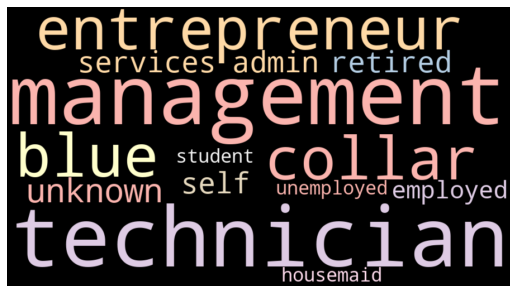

In [ ]:
from matplotlib import rcParams
from wordcloud import WordCloud

rcParams['figure.figsize'] = 9,9

# adding all the words in topics into the text as a string to pass in the word cloud.

text = '+'.join(df['job'].unique())

# creating a wordclound object and assigning paramenters
wordcloud = WordCloud(width = 900, height = 500, 
                      random_state=1, background_color="black",
                      colormap="Pastel1")

# generating word clound by its object
wordcloud.generate(text)

# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* Managemet and Technicians are most contacted profiles.
* From the least contacted jobs like students, unemployed, retired are more likely to subscribe (from above analysis).
* Marketing personals needs to increase campaigns for students retired and unemployed profiles.    

### *Relation between Marital status to subscription and education to subscription*

<Figure size 144x288 with 0 Axes>

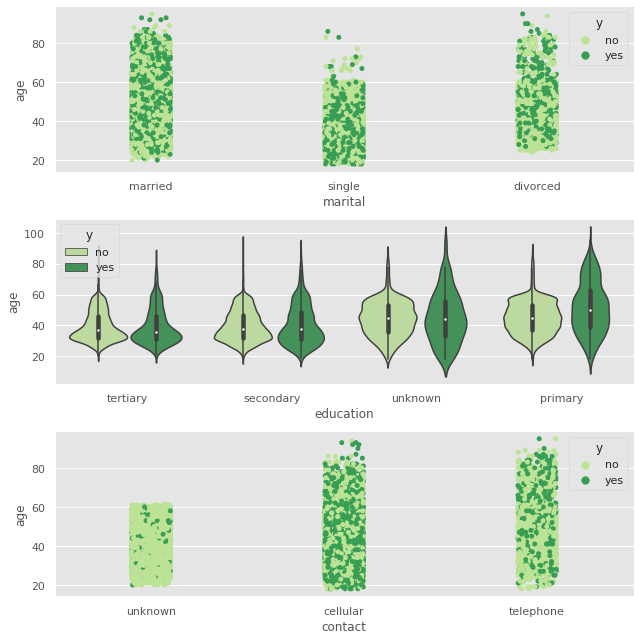

In [ ]:
# setting size and subplots
plt.figure(figsize=(2, 4))
fig, ax = plt.subplots(3)

# plotting 2 plots, marital and education with relation to subscription on age basis 
sns.stripplot(x ='marital',y='age', data = df, hue ='y', palette="YlGn", ax=ax[0])
sns.violinplot(x ='education', y='age', data = df, hue ='y', palette="YlGn", ax=ax[1])
sns.stripplot(x='contact', y= 'age',data=df, hue='y',palette="YlGn", ax=ax[2])

plt.tight_layout()

From the plots we can conclude that-
* Married people are more likely for subscription, and divorced are least likely.
* In terms of education, primary educated with more than 55 age are more likely to subscribed, also in others category, age above 60 are likely to be subscribed. and tertiary and secondary categories may depend on other factors. 
* Clients contacted through cellular mode are more likely to subscribe then telephone.

### *Reation between Balance and age of client w.r.t. to subscriptions*

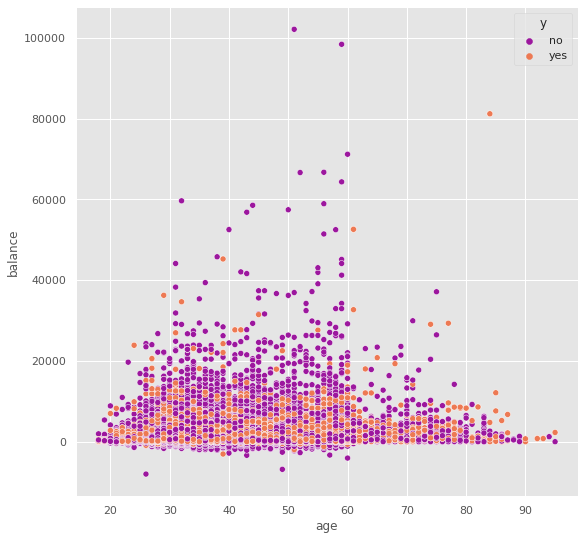

In [ ]:
#plotting scatterplot for analysing relation on dependent variable
sns.scatterplot(data=df, y= 'balance', x='age', 
                hue='y', palette= 'plasma')

* Not a clear relation with age and balance of holders, but we notice that after age 60 balance is less than 5000 euros.
* clients whose balance is under 15000 euros are more likely to subscribe. 
* Also, we see that even if age is above 60 with low balance but they are still more likely to subscribe.

### *Analysing housing and personal loan impact on subscription rat*e.

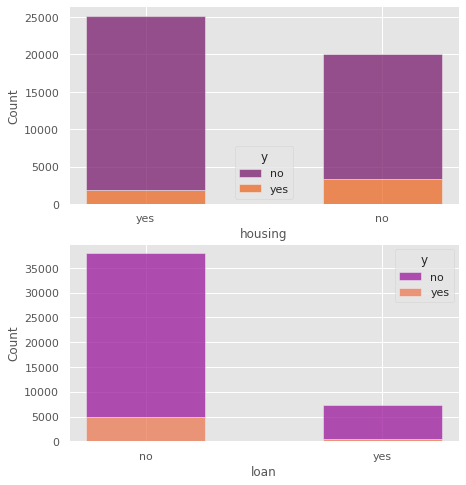

In [ ]:
#   adjusting the size
rcParams['figure.figsize'] = 7,8
# creatung subplots
fig, ax = plt.subplots(2)

# plotting the histograms of the counts with respect to subscription
sns.histplot(df, x='housing', hue='y', multiple='stack', shrink=0.5, ax=ax[0], palette='inferno')
sns.histplot(df, x='loan', hue='y', multiple='stack', shrink=0.5, ax=ax[1], palette='plasma')
plt.show()

* When a client has no housing loan then chances of subscribtion rises.
* when a client has no personal loan then he is more likely to subscribe.